In [1]:
!pip install transformers

In [2]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.2 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [3]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:12
🔁 Restarting kernel...


In [1]:
!conda install -c conda-forge rdkit

Channels:
 - conda-forge
Platform: linux-64
Solving environment: | / - \ | done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.7.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - rdkit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.1.0               |       hd590300_1          19 KB  conda-forge
    brotli-bin-1.1.0           |       hd590300_1          19 KB  conda-forge
    ca-certificates-2024.8.30  |       hbcca054_0         155 KB  conda-forge
    cairo-1.18.0               |       h3faef2a_0         959 KB  conda-forge
    certifi-2024.8.30          |     pyhd8ed1ab_0         160 KB  conda-forge
    chardet-5.2.0              |  py310hff52083_2         238 KB  conda-forge
    contour

In [2]:
from transformers import pipeline
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem

In [3]:
smiles='CN(C)C/C=C/C(=O)NC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(=C(C=C3)F)Cl)O[C@H]4CCOC4'

In [4]:
pipe = pipeline("text2text-generation", model="sagawa/ReactionT5-retrosynthesis", max_length=512, device='cuda')
prediction=pipe.predict(smiles)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/761 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/795M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.35k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/36.4k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.23k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [5]:
rxn=prediction[0]['generated_text']
rxn=rxn.replace(' ','')  #Remove all unnecessary spaces

In [6]:
#Visualize reaction
rxn=AllChem.ReactionFromSmarts(smiles+">>"+rxn)

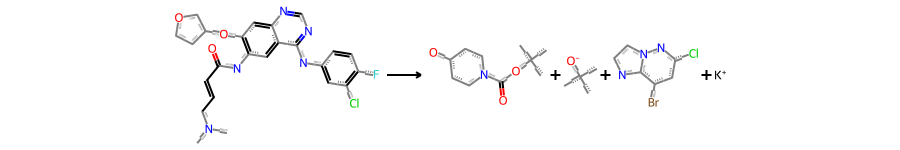

In [7]:
rxn

In [14]:
rxn=prediction[0]['generated_text']
rxn=rxn.replace(' ','')  #Remove all unnecessary spaces

In [15]:
smiles+'>>'+rxn

'CN(C)C/C=C/C(=O)NC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(=C(C=C3)F)Cl)O[C@H]4CCOC4>>CC(C)(C)OC(=O)N1CCC(O)CC1.CC(C)(C)[O-].Clc1cc(Br)c2nccn2n1.[K+]'

In [9]:
#Generate an enzyme that could possibly catalyse the reaction. Generating just one for this case of a demo.
pipe = pipeline("text-generation", model="AI4PD/ZymCTRL", device='cuda')
res=pipe.predict(smiles+'>>'+rxn)

config.json:   0%|          | 0.00/765 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.88G [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/4.33k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/84.3k [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:1 for open-end generation.


In [10]:
predicted_enzyme=res[0]['generated_text'].replace(smiles+'>>'+rxn,"").replace(" ","")

In [11]:
predicted_enzyme

'DIKHFSPEYWIGMNHDSPDAEDKSEEDVVGRELVTCVGNDSWIRVPVDAFIEAKADQVKGTSPELIAKARCDLPSFLYDSTSRDSMSPVLPRINQAPSMLPNTTLVVLDRDNEGVPLIFKVLPDITVWDINTAKMLDLIRGLYMSPAAIIMSYNYLDRDTAKWVKSYGSQVEANYTWDIKNAAQQAFMELGRSASSERHERRSAFMTRDLGFRQRGEMLPGPTDESDGLSAKKIRATLDSATAQGDYARVARKRLGAFNYQRHVVSGDFHRKLSEVRTWLQYLQALGSATREILDSAKGLRLDRLREDETFVAAQAKDPKLTEMIVGRVDHRIRRWSEKDGAAVQELLLFLAASSIPAYSKPSKGIKWNAAATPAHWNVVLNHTLVLDARHMIFHGVTAGSNAVCIEHVRDTGRSCIRTLYPAVDRGTKQGEEVGRSCELGSACEIAGRGRELTGEDSRADDIPDIASSLIPVSLATADGQVISAEDGTYTFSFK'